<a href="https://colab.research.google.com/github/weihanyau/ML-Hackathon/blob/main/Copy_of_ML_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import required libraries

In [ ]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns


# Dataset

Read the dataset from the github repository and display the dataset overview 


In [ ]:
data_set=pd.read_csv('https://raw.githubusercontent.com/weihanyau/ML-Hackathon/main/data.csv',delimiter='\t')
data_set.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


Remove the columns that are mentioned and related about the time and location. 
and also remove the columns which are:

1.  Testelapse - Total time spent on the DASS
2.  Introelapse - Total time spent on the introduction page 
3. Surveyelapse - Total time spent answering the rest of the demographic and survey questions 


The Ten Item Personality Inventory(TIPI) items were rated "I see myself as:" _ such that

1 = Disagree strongly
2 = Disagree moderately
3 = Disagree a little
4 = Neither agree nor disagree
5 = Agree a little
6 = Agree moderately
7 = Agree strongly

Rename all the TIPI into TIPI1 Extraverted-enthusiastic, Critical-quarrelsome, Dependable-self_disciplined, Anxious-easily upset, Open to new experiences-complex, Reserved-quiet, Sympathetic-warm, Disorganized-careless, Calm-emotionally_stable, Conventional-uncreative respectively. 

In [ ]:
Data_0 = data_set.copy()
Data_0['major'] = Data_0['major'].replace(np.nan,'No Degree')
time = [i for i in Data_0.iloc[:,0:126] if  'E' in i] 
position = [i for i in Data_0.iloc[:,0:126] if  'I' in i]
Data_0 = Data_0.drop(position,axis=1)
Data_0 = Data_0.drop(time,axis=1)
Data_0 = Data_0.drop(Data_0.iloc[:,43:47],axis=1)
Data_1 = Data_0.copy()
Data_1 = Data_1.drop(Data_1.iloc[:,53:69],axis=1)
Data_1 = Data_1.replace(to_replace=0,value=3)
Data_1 = Data_1.rename(columns={'TIPI1':'Extraverted-enthusiastic','TIPI2':'Critical-quarrelsome',
                            'TIPI3':'Dependable-self_disciplined','TIPI4':'Anxious-easily upset',
                            'TIPI5':'Open to new experiences-complex','TIPI6':'Reserved-quiet',
                            'TIPI7':'Sympathetic-warm','TIPI8':'Disorganized-careless','TIPI9':'Calm-emotionally_stable',
                            'TIPI10':'Conventional-uncreative'})


print('Shape',Data_1.shape)
print('Attributes',Data_1.columns)

Shape (39775, 68)
Attributes Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'country',
       'Extraverted-enthusiastic', 'Critical-quarrelsome',
       'Dependable-self_disciplined', 'Anxious-easily upset',
       'Open to new experiences-complex', 'Reserved-quiet', 'Sympathetic-warm',
       'Disorganized-careless', 'Calm-emotionally_stable',
       'Conventional-uncreative', 'education', 'urban', 'gender', 'engnat',
       'age', 'screensize', 'uniquenetworklocation', 'hand', 'religion',
       'orientation', 'race', 'voted', 'married', 'familysize', 'major'],
      dtype='object')


Display the dataset again

In [ ]:
Data_0.head(5)

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,4,2,4,4,4,4,4,2,1,...,1,1,1,12,1,10,2,1,2,No Degree
1,4,1,2,3,4,4,3,4,3,2,...,2,1,2,7,0,70,2,1,4,No Degree
2,3,1,4,1,4,3,1,3,2,4,...,2,1,1,4,3,60,1,1,3,No Degree
3,2,3,2,1,3,3,4,2,3,3,...,2,1,2,4,5,70,2,1,5,biology
4,2,2,3,4,4,2,4,4,4,3,...,2,2,3,10,1,10,2,1,4,Psychology


Cleaing and recategorised all the major based on the participant in this survey

Participant with blank, no answers and type of &#1593 are considered under no Degree 

In [ ]:
def condition(title):
    if 'busin' in str(title).lower() or 'manage' in str(title).lower() or 'Buss' in str(title) or 'Bisness' in str(title) or 'Manag' in str(title) or 'buis' in str(title) or 'Entrepreneur' in str(title) or 'entrepr' in str(title).lower() or 'managment' in str(title).lower() or 'Buis' in str(title) or 'Busni' in str(title) or 'Mana' in str(title) or 'buss' in str(title).lower() or 'Bi' in str(title) or 'Mgt' in str(title) or 'MBA' in str(title) or 'Mgmt' in str(title) or 'MD' in str(title):
        return 'Business/Management'
    elif 'information technology' in str(title).lower() or 'IT' in str(title) or 'it' in str(title):
        return 'I.T'
    elif 'math' in str(title).lower() or 'LOGISTICS' in str(title) or 'st' in str(title).lower() or 'marh' in str(title).lower() or 'Mate' in str(title):
        return 'Mathematics'
    elif 'computer' in str(title).lower():
        return 'I.T'
    elif 'bio' in str(title).lower() or 'Plant' in str(title) or 'plant' in str(title).lower() or 'Micro' in str(title):
        return 'Biology'
    elif 'tesl' in str(title).lower() or 'TES' in str(title) or 'Teso' in str(title) or 'Enhlish' in str(title):
        return 'English'
    elif 'account' in str(title).lower() or 'Accoun' in str(title) or 'Acc' in str(title) or 'acc' in str(title).lower() or 'Acouunt' in str(title) or 'Acvount' in str(title) or 'Count' in str(title):
        return 'Accountacy'
    elif 'CA' in str(title):
        return 'CA'
    elif 'none' in str(title).lower() or '0' in str(title) or  '_' in str(title) or '.' in str(title) or 'Nine' in str(title) or '19' in str(title):
        return 'No Degree'
    elif 'nurs' in str(title).lower() or 'BSN' in str(title):
        return 'Nursing'
    elif '-' in str(title).lower() or 'NIL' in str(title):
        return 'No Degree'
    elif 'teach' in str(title).lower() or 'Lect' in str(title) or 'eet' in str(title).lower():
        return 'Teaching'
    elif 'pharma' in str(title).lower() or 'medic' in str(title).lower() or 'med' in str(title).lower() or 'hospi' in str(title).lower() or 'Mwdicine' in str(title) or 'Farmacy' in str(title) or 'Pharacology' in str(title) or 'farmasi' in str(title).lower() or 'Farmasy' in str(title):
        return 'Pharmacy/Medical'
    elif 'doctor' in str(title).lower() or  'MBBS' in str(title) or 'Mbbs' in str(title) or 'Surge' in str(title) or 'surge' in str(title) or 'mbbs' in str(title).lower()or 'dermat' in str(title).lower() or 'Podiat' in str(title) :
        return 'Doctor'
    elif 'no' in str(title).lower() or 'Undec' in str(title) or 'Idk' in str(title) or 'idk' in str(title).lower() or 'Hahaha' in str(title) or 'never' in str(title).lower() or 'T' in str(title) or 'Good' in str(title):
        return 'No Degree'
    elif 'film' in str(title).lower() or 'Cinema' in str(title) or 'fil' in str(title).lower() or 'Adver' in str(title) or 'adver' in str(title) or 'Act' in str(title) or 'Enter' in str(title) or 'digital' in str(title).lower() or 'cinema' in str(title).lower() or 'Video' in str(title) or 'Direct' in str(title) or 'Theat' in str(title) or 'Radio' in str(title) or 'theat' in str(title).lower() or 'drama' in str(title).lower():
        return 'Media'
    elif 'international' in str(title).lower() or 'Internatianal' in str(title):
        return 'International Relations'
    elif 'human' in str(title).lower() or 'hr' in str(title).lower() or 'Hs' in str(title) or 'Hm' in str(title) or 'Humam' in str(title):
        return 'Human Resources'
    elif 'art' in str(title).lower() or 'Painting' in str(title) or 'Drawing' in str(title) or 'ba' in str(title) or 'Printing' in str(title) or 'las' in str(title).lower() or 'Ma' in str(title) or 'paint' in str(title).lower() or 'creative' in str(title).lower() or 'AA' in str(title) or 'BA' in str(title):
        return 'Arts'
    elif 'islam' in str(title).lower() or 'Muamalat' in str(title) or 'Quran' in str(title) or 'Halal' in str(title) or 'Usul' in str(title) or 'Zakat' in str(title) or 'usul' in str(title).lower():
        return 'Islamic Studies'
    elif 'physio' in str(title).lower() or 'fis' in str(title).lower():
        return 'Physiotherapy'
    elif 'socio' in str(title).lower() or 'social' in str(title).lower() or 'soical' in str(title).lower() or 'Sis' in str(title) or 'Sosio' in str(title) or 'Sicio' in str(title) or 'sosiality' in str(title).lower():
        return 'Sociology'
    elif 'bank' in str(title).lower():
        return 'Banking'
    elif 'agri' in str(title).lower():
        return 'Agriculture'
    elif 'Market' in str(title) or 'Finan' in str(title) or 'finance' in str(title).lower() or 'MARKETING' in str(title) or 'market' in str(title).lower() or 'retail' in str(title).lower() or 'CMP' in str(title) or 'Merket' in str(title):
        return 'Marketing/Finance'
    elif 'counsel' in str(title).lower() or 'cauns' in str(title) or 'Kaunseling' in str(title) or 'kaunseling' in str(title) or 'Caunsel' in str(title):
        return 'Counselling'
    elif 'programming' in str(title).lower() or 'coding' in str(title).lower() or 'Ibm' in str(title) or 'ceit' in str(title) or 'Hacking' in str(title):
        return 'I.T'
    elif 'civil' in str(title).lower() or 'comp' in str(title).lower() or 'Mechanical' in str(title) or 'Electrical' in str(title) or 'Mechatronics' in str(title) or 'Eee' in str(title) or 'cs' in str(title).lower() or 'mecha' in str(title) or 'Chemical' in str(title) or 'chemical' in str(title) or 'tech' in str(title) or 'ec' in str(title).lower() or 'egineering' in str(title).lower() or 'manufacturing' in str(title).lower():
        return 'Engineering'
    elif 'ict' in str(title).lower() or 'developer' in str(title).lower() or 'I.T' in str(title) or 'CAE&D' in str(title) or 'It' in str(title):
        return 'I.T'
    elif 'commu' in str(title).lower() or 'comm' in str(title).lower() or 'com' in str(title).lower() or 'Conmunication' in str(title):
        return 'Communications'
    elif 'administration' in str(title).lower() or 'admin' in str(title).lower():
        return 'Administration'
    elif 'psycho' in str(title).lower() or 'psy' in str(title).lower() or 'Clinical osychology' in str(title) or 'hschology' in str(title) or 'Pysch' in str(title) or 'pys' in str(title).lower() or 'Pych' in str(title) or 'pscy' in str(title) or 'payc' in str(title).lower() or 'Phyc' in str(title) or 'psicologia' in str(title) or 'Phsychology' in str(title) or 'Phichology' in str(title) or 'psuchology' in str(title) or 'Pschology' in str(title) or 'psikologi' in str(title).lower():
        return 'Psychology'
    elif 'english' in str(title).lower() or 'Elglish' in str(title) or 'esl' in str(title).lower() or 'Emg' in str(title) or 'emglisj' in str(title).lower():
        return 'English'
    elif 'law' in str(title).lower() or 'BBA' in str(title) or 'llb' in str(title) or 'lew' in str(title).lower() or 'kaw' in str(title).lower() or 'enforcement' in str(title).lower() or 'Kaw' in str(title):
        return 'Law'
    elif 'engineering' in str(title).lower() or 'engi' in str(title).lower() or 'eng' in str(title).lower() or 'Software' in str(title) or 'soft' in str(title).lower() or 'mechanical' in str(title).lower() or 'Egineeering' in  str(title) or 'electronic' in str(title).lower() or 'CE' in str(title) or 'mech' in str(title).lower() or 'Ciclvil' in str(title) or 'Eggineering' in str(title) or 'Tech' in str(title) or 'Teol' in str(title) or 'EEE' in str(title) or 'PE' in str(title):
        return 'Engineering'
    elif 'architecture' in str(title).lower() or 'aechitecture' in str(title).lower() or 'archirecture' in str(title).lower() or 'architect' in str(title).lower() or 'Arsitechture' in str(title) or 'Building' in str(title) or 'building' in str(title).lower() or 'Arc' in str(title):
        return 'Architecture'
    elif 'design' in str(title).lower() or 'Desig' in str(title) or 'Dssign' in str(title):
        return 'Designer'
    elif 'science' in str(title).lower() or 'Sceince' in str(title) or 'Sci' in str(title) or 'sciene' in str(title) or 'BS' in str(title):
        return 'Pure Sciences'
    elif 'physics' in str(title).lower() or 'Phsyics' in str(title) or 'EMC' in str(title) or 'Physic' in str(title) or 'physi' in str(title):
        return 'Physics'
    elif 'chemistry' in str(title).lower() or 'CIS' in str(title) or 'Chem' in str(title):
        return 'Chemistry'
    elif 'french' in str(title).lower() or 'Fr' in str(title):
        return 'French'
    elif 'religi' in str(title).lower() or 'Relegion' in str(title) or 'Rel' in str(title) or 'Hukum' in str(title) or 'Sains' in str(title):
        return 'Religious Studies'
    elif title=='&#1593;&#1604;&#1605; &#1606;&#1601;&#1587;' or title=='&#22810;&#23186;&#39636;&#35373;&#35336;' or title=='nil' or title=='drop out' or title=='&#1055;&#1089;&#1080;&#1093;&#1086;&#1083;&#1' or title=='75' or title=='Secondary education' or title=='Thiê&#769;t kê&#769; &#273;ô&#768; ho&#803;a' or title=='18' or title=='ongoing' or title=='&#28888;&#22521;' or title=='lol' or title=='In college currently' or title=='secondary education' or title=='Dropped out' or title=='na' or title=='didnt attend' or title=='im going on the next year. ' or title=='&#304;lahiyat' or title=='lmfao, im 15' or title=='Elem Ed' or title=='yes' or title=='N/a' or title=='/' or title=='???' or title=='cocaine 101' or title=='doesnt matter' or title== 'oooo' or title=='G' or title=='Yes' or title=='Na' or title=='Na 'or title=='Want sure':
        return 'No Degree'
    elif 'Music' in str(title) or 'Dance' in str(title) or 'danc' in str(title).lower() or 'Vocational' in str(title) or 'Muisc' in str(title) or 'music' in str(title).lower() or 'Performance' in str(title):
        return 'Music/Dance'
    elif 'pol' in str(title).lower() or 'Govern' in str(title) or 'Right' in str(title):
        return 'Politics'
    elif 'photo' in str(title).lower() or 'Foto' in str(title) or 'Photo' in str(title):
        return 'Photography'
    elif 'Television' in str(title) or 'telev' in str(title).lower():
        return 'Television'
    elif 'bahasa' in str(title).lower() or 'Bahasa' in str(title) or 'Malay' in str(title) or 'malay' in str(title).lower():
        return 'Malaysian languages'
    elif 'Urban' in str(title) or 'Town' in str(title) or 'town' in str(title).lower() or 'planning' in str(title) or 'Plann' in str(title) or 'development' in str(title):
        return 'Economic Developments'
    elif 'Public' in str(title) or 'public' in str(title).lower():
        return 'Public Relations'
    elif 'Writing' in str(title) or 'writing' in str(title).lower() or 'Screenwritinf' in str(title) or 'Author' in str(title):
        return 'Writing/Author'
    elif 'philosophy' in str(title).lower() or 'Phil' in str(title) or 'philos' in str(title).lower() or 'Filo' in str(title) or 'Phylosophy' in str(title):
        return 'Philosophy'
    elif 'Actua' in str(title):
        return 'Acturial Studies'
    elif 'DENTALWORKS' in str(title) or 'dental' in str(title) or 'Dental' in str(title) or 'Odont' in str(title):
        return 'Dentist'
    elif 'beaut' in str(title).lower() or 'Fashion' in str(title) or 'make' in str(title) or 'fashion' in str(title).lower() or 'hair' in str(title).lower() or 'cosmet' in str(title).lower():
        return 'Fashion'
    elif 'Health' in str(title) or 'health' in str(title).lower() or 'wellness' in str(title).lower() or 'Healtcare' in str(title):
        return 'Healthcare'
    elif 'Language' in str(title) or 'lang' in str(title).lower() or 'Laq' in str(title):
        return 'Languages'
    elif 'cook' in str(title).lower() or 'bakery' in str(title).lower() or 'Bak' in str(title) or 'CULINARY' in str(title) or 'Food' in str(title) or 'food' in str(title) or 'chef' in str(title).lower() or 'Cul' in str(title) or 'Patiss' in str(title) or 'culi' in str(title).lower():
        return 'Cookings'
    elif 'Hotel' in str(title) or 'hotel' in str(title).lower() or 'food service' in str(title) or 'cater' in str(title).lower():
        return 'Hotel Management'
    elif 'therapy' in str(title).lower() or 'ot' in str(title).lower() or 'theraphy' in str(title):
        return 'Therapeutical Studies'
    elif 'veter' in str(title).lower() or 'Veter' in str(title) or 'Vet' in str(title):
        return 'Veterinary'
    elif 'Survey' in str(title) or 'survey' in str(title) or 'serveyors' in str(title).lower() or 'Qs' in str(title) or 'SURVEYING' in str(title) or 'QS' in str(title) or 'Surver' in str(title):
        return 'Surveyour Studies'
    elif 'Aircraft' in str(title) or 'aircraft' in str(title).lower() or 'aircr' in str(title).lower() or 'aviation' in str(title).lower() or 'Aero' in str(title) or 'navigation' in str(title).lower():
        return 'Aircrafts'
    elif 'environment' in str(title).lower() or 'Environment' in str(title) or 'envi' in str(title).lower():
        return 'Environmental Educations'
    elif 'Syariah' in str(title) or 'syariah' in str(title):
        return 'Syrian Languages'
    elif 'judicial' in str(title).lower() or 'juri' in str(title).lower() or 'legal' in str(title).lower():
        return 'Judicial Studies'
    elif 'Liter' in str(title) or 'literature' in str(title) or 'litt' in str(title).lower():
        return 'Literature'
    elif 'child' in str(title).lower() or 'Child' in str(title) or 'Preschool' in str(title):
        return 'Child Educations'
    elif 'Tour' in str(title) or 'tour'  in str(title).lower():
        return 'Tourisms'
    elif 'Gam' in str(title) or 'game' in str(title).lower():
        return 'Gaming'
    elif 'education' in str(title).lower() or 'Education' in str(title) or 'ed' in str(title).lower() or 'acad' in str(title) or 'Dploma' in str(title):
        return 'B.Ed or M.Ed'
    elif 'Sport' in str(title) or 'sport' in str(title).lower():
        return 'Sports'
    elif 'Petro' in str(title):
        return 'Petroleum'
    elif 'Journ' in str(title) or 'jour' in str(title).lower() or 'Joun' in str(title) or 'Jurn' in str(title):
        return 'Journalism'
    elif 'Mandarin' in str(title):
        return 'Chinese/Mandarin Languages'
    elif 'Electrician' in str(title):
        return 'Electrician'
    elif 'Network' in str(title) or 'network' in str(title).lower():
        return 'Networking'
    elif 'geo' in str(title).lower() or 'GEO' in str(title):
        return 'Geography'
    elif 'Librarian' in str(title) or 'lib' in str(title).lower():
        return 'Librarian'
    elif 'Mission' in str(title) or 'mission' in str(title).lower():
        return 'Missionary Studies'
    elif 'Forensic' in str(title) or 'foren' in str(title).lower() or 'Crime' in str(title) or 'crim' in str(title).lower():
        return 'Forensic/Criminal studies'
    elif 'Animation' in str(title) or 'animation' in str(title).lower() or 'imag' in str(title) or 'graphic' in str(title) or 'Graphic' in str(title):
        return 'Animations'
    elif 'aqua' in str(title).lower() or 'Aqu' in str(title):
        return 'Aquaculture'
    elif 'soldier' in str(title).lower() or 'lwa' in str(title).lower() or 'defence' in str(title):
        return 'Army'
    elif 'Kinesi' in str(title) or 'kines' in str(title).lower() or 'hod' in str(title):
        return 'Human Kinetics'
    elif 'Horti' in str(title) or 'horti' in str(title) or 'Landscape' in str(title):
        return 'Horticulture'
    elif 'commerce' in str(title).lower() or 'Coome' in str(title):
        return 'Commerce'
    elif 'Speech' in str(title) or 'speech' in str(title).lower():
        return 'Speech Pathology'
    elif 'SECRET' in str(title) or 'secret' in str(title).lower():
        return 'Secretary'
    elif 'Animals' in str(title) or 'animal' in str(title).lower() or 'Pet' in str(title):
        return 'Animal Care'
    elif 'Organisation' in str(title) or 'organi' in str(title).lower():
        return 'Organizational Behaviour'
    elif 'event' in str(title).lower() or 'Event' in str(title):
        return 'Event Managment'
    elif 'radiology' in str(title).lower() or 'Radiography' in str(title) or 'radiograpghy' in str(title).lower() or 'Radiation' in str(title) or 'radiography' in str(title):
        return 'Radiography'
    elif 'nutrition' in str(title).lower() or 'Nutrition' in str(title):
        return 'Nutritionist'
    elif 'Audit' in str(title) or 'audit' in str(title).lower():
        return 'Auditing'
    elif 'Neuro' in str(title) or 'neuroligy' in str(title).lower():
        return 'Neurology'
    elif 'Anato' in str(title) or 'anat' in str(title).lower():
        return 'Anatomy'
    elif 'trade' in str(title).lower():
        return 'Trading'
    elif 'Interpre' in str(title) or 'translation' in str(title).lower():
        return 'Interpreter'
    elif 'audio' in str(title).lower() or 'Audio' in str(title):
        return 'Audiology'
    elif 'insurance' in str(title).lower() or 'Insurance' in str(title):
        return 'Insurances'
    elif 'archaeology' in str(title).lower() or 'archaeology' in str(title).lower() or 'archeology' in str(title).lower() or 'treasury' in str(title):
        return 'Archeology'
    elif 'SERV'in str(title) or 'service' in str(title).lower():
        return 'Service Training'
    elif 'GERMAN' in str(title) or 'german' in str(title).lower():
        return 'German'
    elif 'KOREAN' in str(title) or 'Korea' in str(title):
        return 'Korean'
    elif 'valuat' in str(title).lower() or 'valuer' in str(title).lower():
        return 'Registered Valuer'
    elif 'skil' in str(title).lower() or 'Skill' in str(title) or 'Professional' in str(title) or 'practical' in str(title).lower():
        return 'Skilled Labour'
    elif 'virology' in str(title):
        return 'Virology'
    elif 'lab' in str(title).lower() or 'Lab' in str(title) or 'MLT' in str(title):
        return 'Laboratory Worker'
    elif 'GENERAL' in str(title) or 'General' in str(title):
        return 'General'
    elif 'Opto' in str(title) or 'opto' in str(title).lower():
        return 'Optometry'
    elif 'Zoo' in str(title) or 'zoo' in str(title).lower():
        return 'Zoology'
    elif 'office' in str(title).lower() or 'Office' in str(title):
        return 'Office Skills'
    elif 'found' in str(title).lower() or 'Found' in str(title):
        return 'Foundation Education'
    elif 'general' in str(title).lower() or 'General' in str(title):
        return 'General Education'
    elif 'real estate' in str(title).lower() or 'property' in str(title).lower():
        return 'Realtor'
    elif 'Meteorology' in str(title) or 'Metrology' in str(title):
        return 'Meterology'
    elif 'operations' in str(title).lower() or 'Operation' in str(title):
        return 'Operational Managment'
    elif 'Merchandising' in str(title) or 'merchand' in str(title).lower():
        return 'Merchandising'
    elif 'Spanish' in str(title):
        return 'Spanish'
    elif 'Nature' in str(title) or 'natur' in str(title).lower():
        return 'Nature Conservation/Resources'
    elif title=='a level ' or title==' ':
        return 'No Degree'
    elif 'Corporate' in str(title) or 'corporate' in str(title).lower():
        return 'Corporate'
    elif 'greek' in str(title).lower() or 'Greek' in str(title):
        return 'Greek'
    elif 'Behaviour' in str(title) or 'Behavior' in str(title) or 'Organizational Behaviour' in str(title):
        return 'Behaviour Analysis'
    elif 'publish' in str(title).lower():
        return 'Publishing'
    elif 'Safety' in str(title) or 'safety' in str(title).lower():
        return 'Safety Training'
    elif 'genetic' in str(title).lower() or 'Genetic' in str(title):
        return 'Genetics'
    elif 'Dietetic' in str(title):
        return 'Dietician'
    elif 'Production' in str(title) or 'manufacturing' in str(title).lower():
        return 'Production And Manufacturing'
    elif 'Welding' in str(title):
        return 'Welding'
    elif 'Geron' in str(title):
        return 'Gerontology'
    elif 'Research' in str(title) or 'Ph D' in str(title):
        return 'Ph.D'
    elif 'arabic' in str(title).lower() or 'Arabic' in str(title):
        return 'Arabic'

    else:
        return title

Data_1['major'] = Data_1['major'].apply(condition)

Create a array and store the column major in the array and display it to get the categories overview 

In [ ]:
list_show=[]
for x in Data_1['major']:
    list_show.append(x)
print(set(list_show))

{'Palaeontology', 'College diploma', 'Malaysian languages', 'Wildlife resources', 'Accountacy', 'Hotel Management', 'Economic Developments', 'maintenance', 'Skilled Labour', 'Tourisms', 'Petroleum', 'Doctor', 'Veterinary', 'Radiography', 'B.Ed or M.Ed', 'Virology', 'Teaching', 'French', 'Banking', 'Fashion', 'Religious Studies', 'Optometry', 'Registered Valuer', 'Leadership', 'Surveyour Studies', 'Engineering', 'Business/Management', 'Languages', 'I.T', 'Pathology', 'theology', 'Anatomy', 'Law', 'Arts', 'Media', 'Dentist', 'Nature Conservation/Resources', 'Archeology', 'Environmental Educations', 'Audiology', 'Networking', 'Missionary Studies', 'Corporate', 'Supply chain', 'Philosophy', 'Zoology', 'Service Training', 'midwivery', 'Singer', 'Ophthmalology', 'Danish', 'Realtor', 'Youth Work', 'Sociology', 'Information ', 'Meterology', 'Cretive Visual', 'Japanese', 'Gerontology', 'Administration', 'Welding', 'Psychology', 'Human Resources', 'Horticulture', 'Geography', 'Dutch', 'Insurance

Drop rows with invalid values

In [ ]:
Data_1=Data_1.replace([np.inf, -np.inf], np.nan)
Data_1=Data_1.dropna()

Make a barchart to have a better understanding about the true number of the participant in the top 20 major


Text(0.5, 1.0, 'The Top 20 Majors of participant in the Survey')

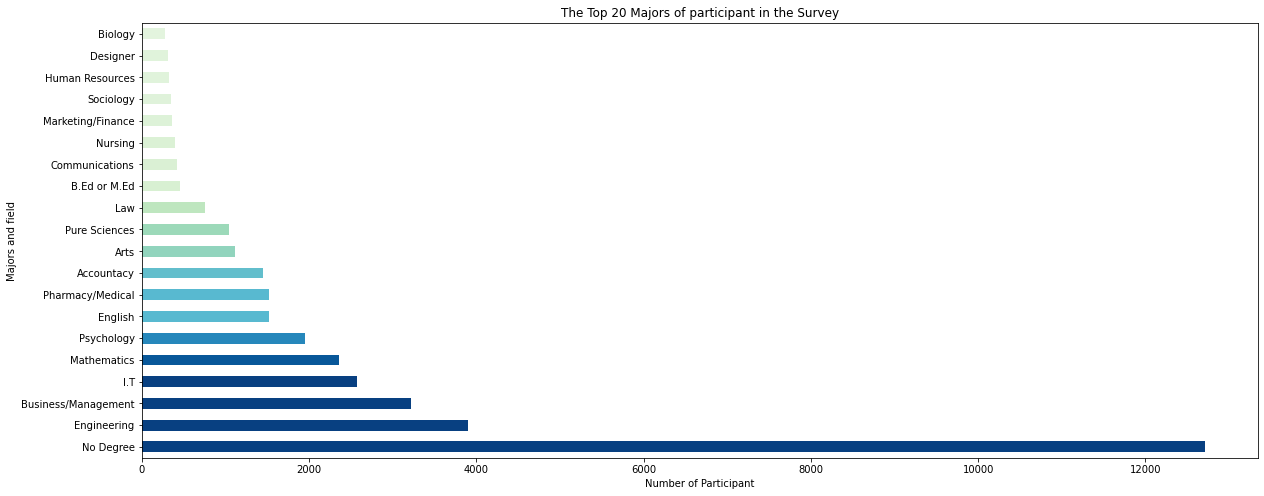

In [ ]:
plt.figure(figsize=(20,8))
cmap = plt.get_cmap("GnBu")
rescale = lambda y: (y - np.min(y)) / ((np.max(y) - np.min(y)) / 5)
Data_1['major'].value_counts()[:20].plot(kind='barh', color=cmap(rescale(Data_1['major'].value_counts())))
plt.ylabel('Majors and field')
plt.xlabel('Number of Participant')
plt.title('The Top 20 Majors of participant in the Survey')

Create a new Age_groups by having only these attributes'Under 10 Children', 'Primary Children', 'teenager', 'Adults'; 'Seniors', 'Elderly' based on the column age. 

Display the dataset and the Age_groups


In [ ]:
def condition(x):
    if x<=6:
        return 'Under 6 Children'
    if 7<=x<=12:
        return 'Primary Children'
    if 13<=x<=17:
        return 'Teenagers'
    if 18<=x<=59:
        return 'Adults'
    if x>=60:
        return 'Elderly'

Data_1['Age_Groups']=Data_1['age'].apply(condition)
Data_1.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups
0,4,4,2,4,4,4,4,4,2,1,...,1,1,12,1,10,2,1,2,No Degree,Teenagers
1,4,1,2,3,4,4,3,4,3,2,...,1,2,7,3,70,2,1,4,No Degree,Teenagers
2,3,1,4,1,4,3,1,3,2,4,...,1,1,4,3,60,1,1,3,No Degree,Teenagers
3,2,3,2,1,3,3,4,2,3,3,...,1,2,4,5,70,2,1,5,Biology,Teenagers
4,2,2,3,4,4,2,4,4,4,3,...,2,3,10,1,10,2,1,4,Psychology,Adults


get the columns after column 42 and store it in the Filtered data for future use.

Get the data from Data_1 and store it in the Data_2 to continue process the data

In [ ]:
Filtered_data=Data_1.iloc[:,42:]
Data_2=Data_1.filter(regex='Q\d{1,2}A')
Data_2.head()


,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A
0,4,4,2,4,4,4,4,4,2,1,...,2,3,4,4,1,2,4,3,4,4
1,4,1,2,3,4,4,3,4,3,2,...,3,2,2,3,4,2,2,1,2,2
2,3,1,4,1,4,3,1,3,2,4,...,1,4,3,4,4,4,2,2,1,4
3,2,3,2,1,3,3,4,2,3,3,...,2,4,1,1,2,1,3,4,4,2
4,2,2,3,4,4,2,4,4,4,3,...,4,4,3,4,3,3,3,4,4,3


Select the column we want to make a depression set framework to work with it 

In [ ]:
def sub(Data_2):
    return Data_2.subtract(1,axis=1)
data_2=sub(Data_2) 
DASS_keys = {'Depression': [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42]}
Dep = []
for i in DASS_keys["Depression"]:
    Dep.append('Q'+str(i)+'A')

depression_set= data_2.filter(Dep)


Evaluate and give score to the depression set and store it in the column Total_Count

In [ ]:
def scores(source):
    col=list(source)
    source['Total_Count']=source[col].sum(axis=1)
    return source
depression_set=scores(depression_set)
#del depression_set['Total_Count'] 

Display the depression set that have been filtered from the original dataset 
(wanna ask about the total value)

In [ ]:
depression_set.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Total_Count
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3,27
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1,24
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3,39
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,16
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2,32


Merged the Depression_set and Filtered_data that we created earlier and display it

In [ ]:
Depression_set=pd.merge(depression_set,Filtered_data,how='left',left_index=True,right_index=True)
Depression_set.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,...,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups
0,1,3,0,3,3,2,0,3,3,3,...,1,1,12,1,10,2,1,2,No Degree,Teenagers
1,1,3,1,3,2,3,1,1,2,1,...,1,2,7,3,70,2,1,4,No Degree,Teenagers
2,3,3,3,3,3,3,3,3,0,3,...,1,1,4,3,60,1,1,3,No Degree,Teenagers
3,1,2,2,0,1,2,0,0,1,2,...,1,2,4,5,70,2,1,5,Biology,Teenagers
4,2,3,2,3,2,3,2,1,3,2,...,2,3,10,1,10,2,1,4,Psychology,Adults


Create a new column name 'Depression_Condition' based on the value in total count and categorise it into 'Normal', 'Mild', 'Moderate', 'Severe', and 'Extremely Severe'

In [ ]:
def condition(x):
    if x<=9:
        return 'Normal'
    if  10<=x<=13:
        return 'Mild'
    if 14<=x<=20:
        return 'Moderate'
    if 21<=x<=27:
        return 'Severe'
    if x>28:
        return 'Extremely Severe'

Depression_set['Depression_Condition']=Depression_set['Total_Count'].apply(condition)
Depression_set.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,...,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups,Depression_Condition
0,1,3,0,3,3,2,0,3,3,3,...,1,12,1,10,2,1,2,No Degree,Teenagers,Severe
1,1,3,1,3,2,3,1,1,2,1,...,2,7,3,70,2,1,4,No Degree,Teenagers,Severe
2,3,3,3,3,3,3,3,3,0,3,...,1,4,3,60,1,1,3,No Degree,Teenagers,Extremely Severe
3,1,2,2,0,1,2,0,0,1,2,...,2,4,5,70,2,1,5,Biology,Teenagers,Moderate
4,2,3,2,3,2,3,2,1,3,2,...,3,10,1,10,2,1,4,Psychology,Adults,Extremely Severe


Display the Depression_condition on a bar chart to have an overview

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Participant Depression Level')

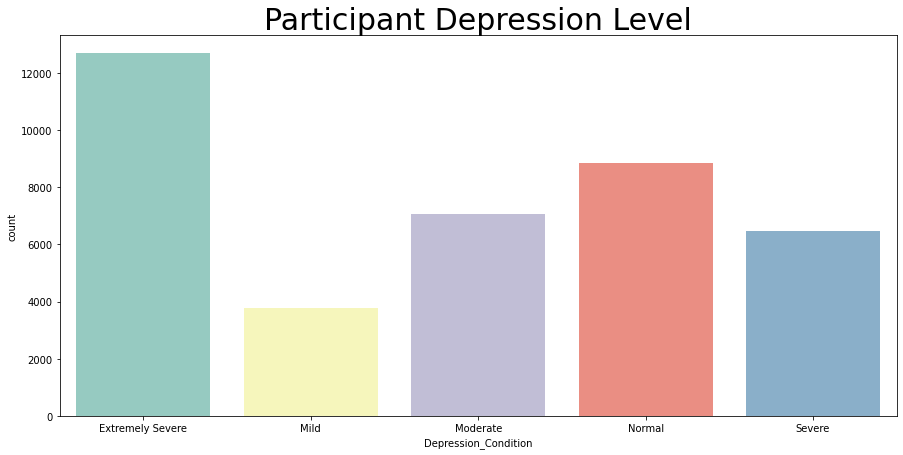

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(Depression_set.sort_values('Depression_Condition').Depression_Condition, palette='Set3')
plt.title('Participant Depression Level',fontsize=30)

Changing variables for Correlation

In [ ]:
Depression_setCopy=Depression_set.copy()
def condition(x):
    if x<=9:
        return 0
    if  10<=x<=13:
        return 1
    if 14<=x<=20:
        return 2
    if 21<=x<=27:
        return 3
    if x>28:
        return 4

def cond(x):
    if x<=10:
        return 0
    if  10<=x<=16:
        return 1
    if 17<=x<=21:
        return 2
    if 21<=x<=35:
        return 3
    if 36<=x<=48:
        return 4
    if x>=49:
        return 5
Depression_setCopy['Depression_level']=Depression_setCopy['Total_Count'].apply(condition)
Depression_setCopy['Age_Groups']=Depression_setCopy['age'].apply(cond)
Depression_setCopy=Depression_setCopy.drop(columns=['age','Total_Count'])
Depression_setCopy.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,...,religion,orientation,race,voted,married,familysize,major,Age_Groups,Depression_Condition,Depression_level
0,1,3,0,3,3,2,0,3,3,3,...,12,1,10,2,1,2,No Degree,1,Severe,3.0
1,1,3,1,3,2,3,1,1,2,1,...,7,3,70,2,1,4,No Degree,1,Severe,3.0
2,3,3,3,3,3,3,3,3,0,3,...,4,3,60,1,1,3,No Degree,2,Extremely Severe,4.0
3,1,2,2,0,1,2,0,0,1,2,...,4,5,70,2,1,5,Biology,1,Moderate,2.0
4,2,3,2,3,2,3,2,1,3,2,...,10,1,10,2,1,4,Psychology,2,Extremely Severe,4.0


Create a heatmap for better overview

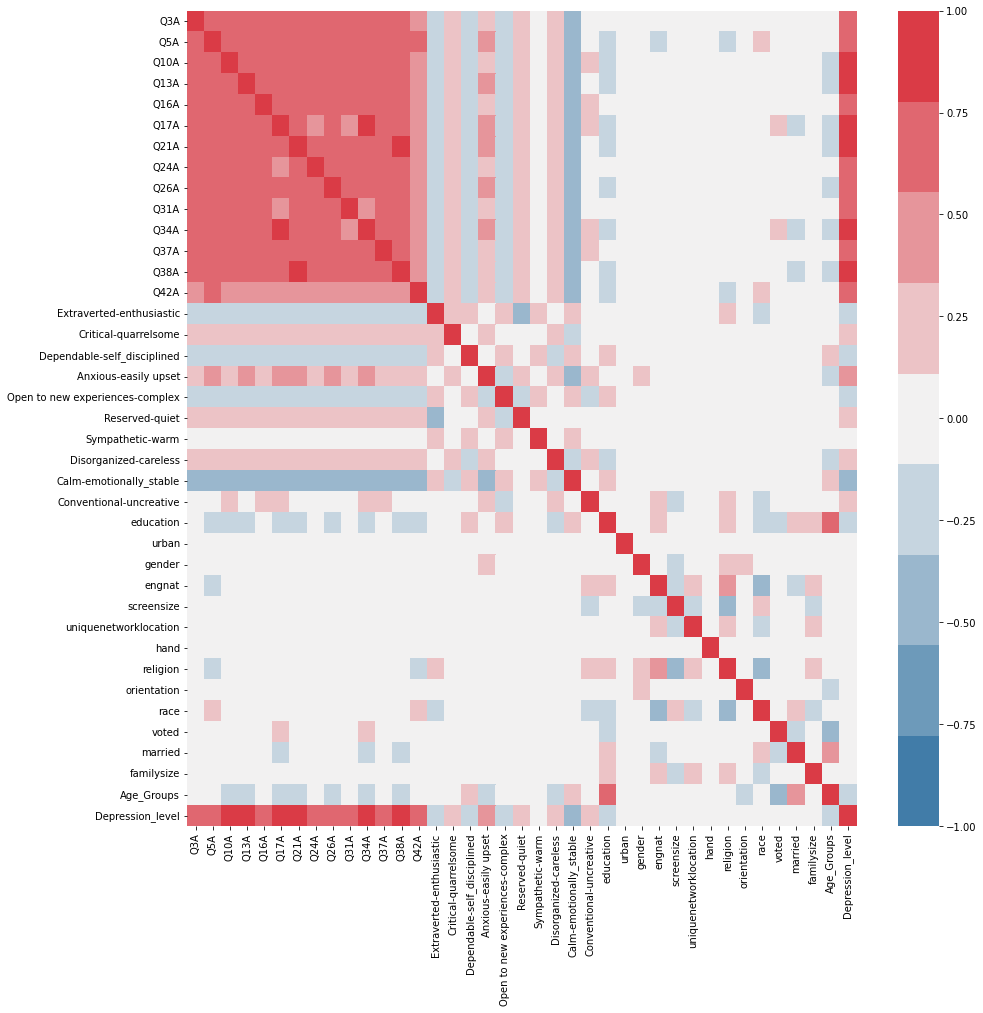

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(Depression_setCopy.corr(),vmin=-1,vmax=1,cmap=sns.diverging_palette(240,10,n=9),)

# Gender


In this case gender are represented by the value



*   1 = Male
*   2 = Female
*   3 = Not Stated



Display the number of participant as of Gender in this data set

In [ ]:
print('Number of participant as of Gender')
Depression_set['gender'].value_counts()

Number of participant as of Gender


2    30366
1     8788
3      619
Name: gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Depression level of Different Gender')

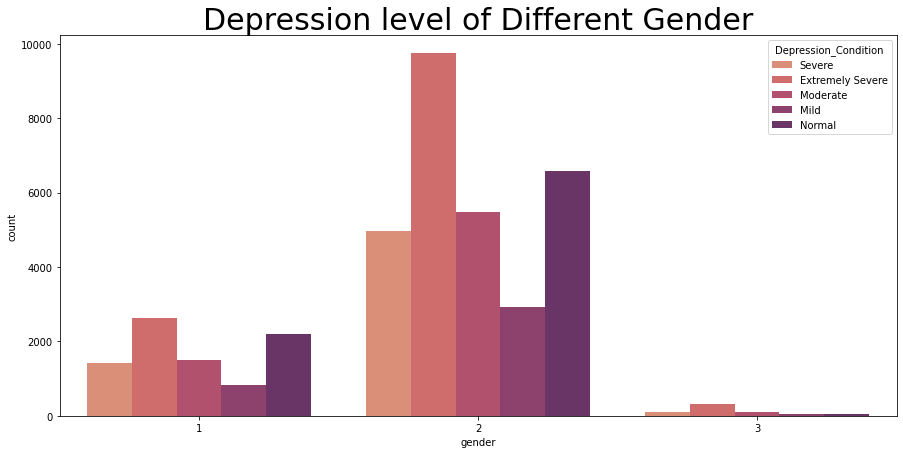

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(Depression_set.sort_values('gender').gender,hue=Depression_set['Depression_Condition'],palette='flare')
plt.title('Depression level of Different Gender',fontsize=30)

# Marital Status 

In this case gender are represented by the value

*   1 = Single
*   2 = Married
*   3 = Divorced

In [ ]:
print('Married status'),
Depression_set['married'].value_counts() 

Married status


1    34130
2     4357
3     1286
Name: married, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Depression level of People based on Martial status')

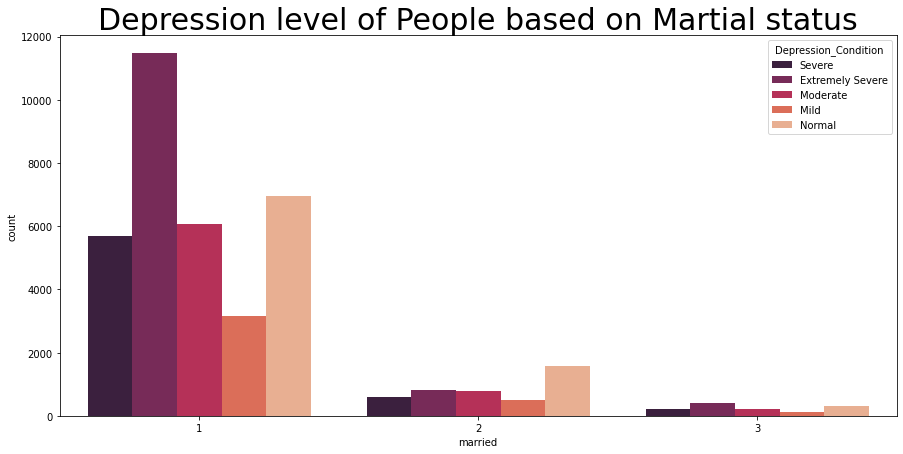

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(Depression_set.sort_values('married').married,hue=Depression_set['Depression_Condition'],palette='rocket')
plt.title('Depression level of People based on Martial status',fontsize=30)

# Religions

In this case Religions are represented by the value

*   1=Agnostic
*   2=Atheist
*   3=Buddhist
*   4=Christian (Catholic)
*   5=Christian (Mormon)
*   6=Christian (Protestant)
*   7=Christian (Other)
*   8=Hindu
*   9=Jewish
*   10=Muslim
*   11=Sikh
*   12=Other



In [ ]:
Depression_set['religion'].value_counts()

10    22073
2      3845
1      3244
4      3097
7      2254
12     1804
6      1544
3       882
8       700
9       144
5       122
11       64
Name: religion, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Depression Condition as per Religion')

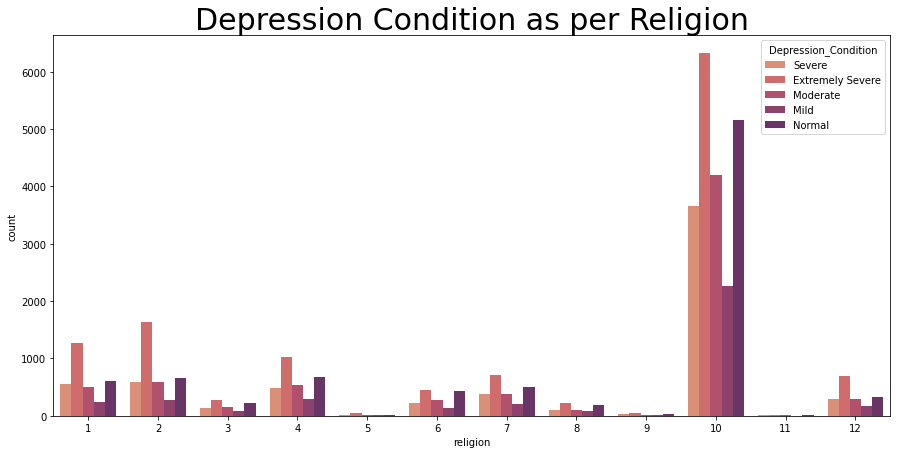

In [ ]:
plt.figure(figsize=(15,7))
a=sns.countplot(Depression_set.sort_values('religion').religion,hue=Depression_set['Depression_Condition'],palette='flare')
plt.title('Depression Condition as per Religion',fontsize=30)

# Races

In this case Races are represented by the value

*   10=Asian
*   20=Arab
*   30=Black
*   40=Indigenous Australian
*   50=Native American
*   60=White
*   70=Other

In [ ]:
print('Number of participants as per races')
Depression_set['race'].value_counts()

Number of participants as per races


10    23106
60    10657
70     4832
30      603
20      333
50      220
40       22
Name: race, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Depression Condition as per Race')

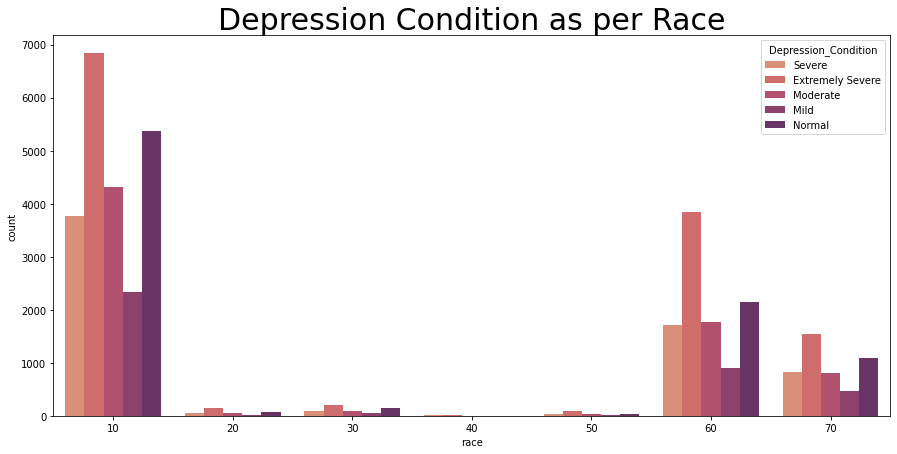

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(Depression_set.sort_values('race').race,hue=Depression_set['Depression_Condition'],palette='flare')
plt.title('Depression Condition as per Race',fontsize=30)

# Sexual Orientation

In this case Sexual Orientation are represented by the value


*  1=Heterosexual
*  2=Bisexual
*  3=Homosexual
*  4=Asexual
*  5=Other



In [ ]:
print('Count of answered recorded as per sexual Orientation')
Depression_set['orientation'].value_counts()

Count of answered recorded as per sexual Orientation


1    24269
3     5063
2     5005
5     3460
4     1976
Name: orientation, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Depression Condition as per different sexual Orientations')

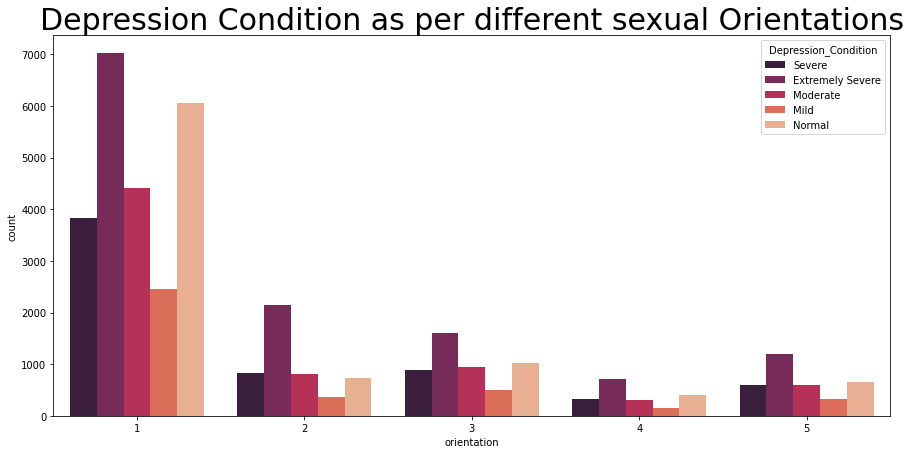

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(Depression_set.sort_values('orientation').orientation,hue=Depression_set['Depression_Condition'],palette='rocket')
plt.title('Depression Condition as per different sexual Orientations',fontsize=30)

So we can see the data is highly imbalanced, we should perform oversampling

# Age Groups

Age are categorised into these groups

* Under 6 Children( <= 6 )
* Primary Children ( 7 - 12 )
* Teenagers ( 13 - 17 )
* Adults ( 18 - 59 )
* Elderly ( >= 60 )

In [ ]:
print('Counts of answered recorded as per age groups')
Depression_set['Age_Groups'].value_counts()

Counts of answered recorded as per age groups


Adults       32201
Teenagers     7269
Elderly        303
Name: Age_Groups, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Depression Condition as per different Age Groups')

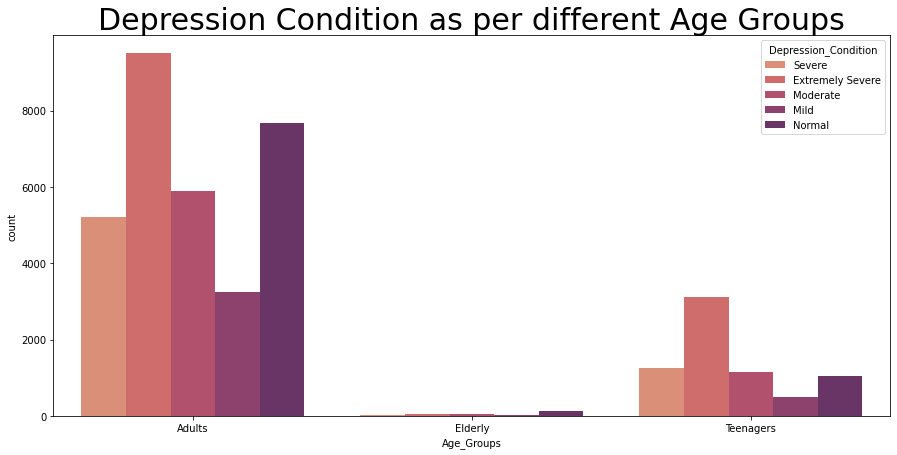

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(Depression_set.sort_values('Age_Groups').Age_Groups,hue=Depression_set['Depression_Condition'],palette='flare')
plt.title('Depression Condition as per different Age Groups',fontsize=30)

# Education level

In this case Education level are represented by the value

* 1=Less than high school
* 2=High school
* 3=University degree
* 4=Graduate degree

In [ ]:
print('Counts of answered recorded as per the Education')
Depression_set['education'].value_counts()

Counts of answered recorded as per the Education


3    15634
2    15065
4     5008
1     4066
Name: education, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Depression Condition as per different Education levels')

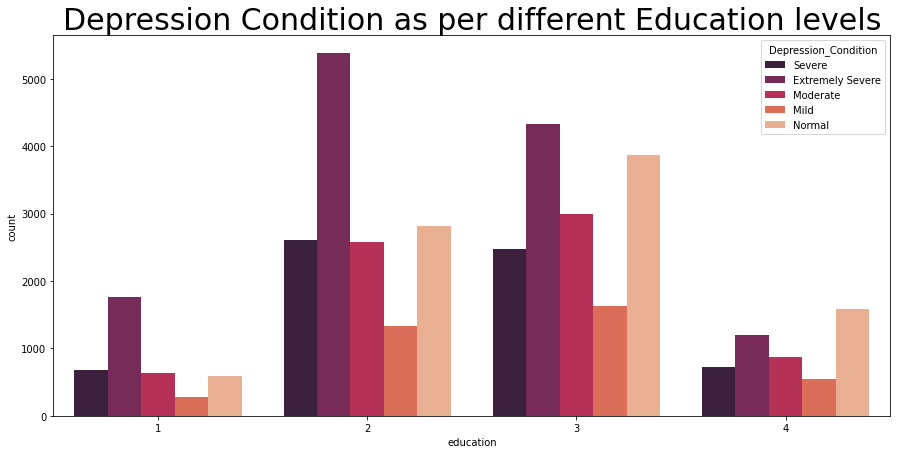

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(Depression_set.sort_values('education').education,hue=Depression_set['Depression_Condition'],palette='rocket')
plt.title('Depression Condition as per different Education levels',fontsize=30)

In [ ]:
def change_var(x):
    if x=='Under 6 Children':
      return 0
    elif x=='Primary Children':
        return 1
    elif x=='Teenager':
        return 2
    elif x=='Adults':
        return 3
    elif x=='Elderly':
        return 4

In [ ]:
Depression_set['Age_Groups']=Depression_set['Age_Groups'].apply(change_var)

#Major

In this case the number of participants of top 20 Major had displayed as below:

In [ ]:
print('Counts of answered recorded as per major')
Depression_set['major'].value_counts().iloc[:20]

Counts of answered recorded as per major


No Degree              12707
Engineering             3904
Business/Management     3220
I.T                     2572
Mathematics             2361
Psychology              1947
English                 1519
Pharmacy/Medical        1518
Accountacy              1445
Arts                    1114
Pure Sciences           1041
Law                      756
B.Ed or M.Ed             453
Communications           419
Nursing                  402
Marketing/Finance        359
Sociology                346
Human Resources          325
Designer                 320
Biology                  282
Name: major, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Depression Condition as per different Major')

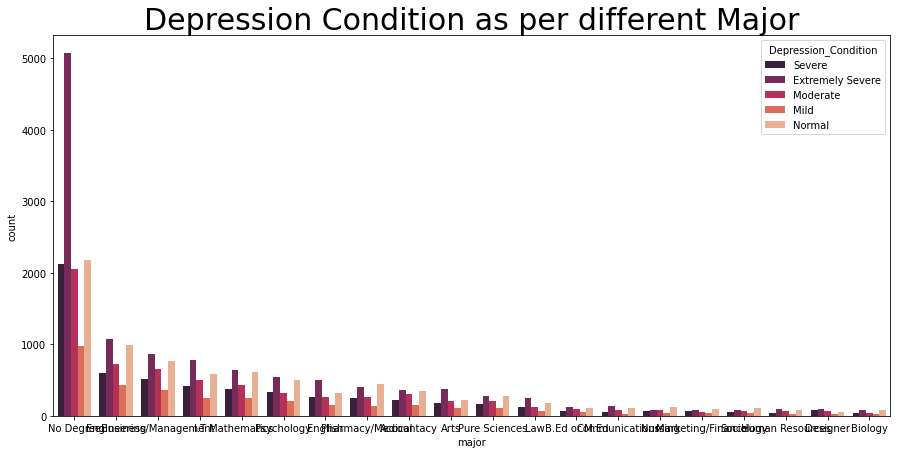

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(Depression_set.sort_values('major').major,hue=Depression_set['Depression_Condition'],palette='rocket', order=Depression_set.major.value_counts().iloc[:20].index)
plt.title('Depression Condition as per different Major',fontsize=30)


Drop the rows where at least one element is missing and drop total count, country and age column

In [ ]:
Depression_set=Depression_set.dropna()
Depression_set=Depression_set.drop(columns=['Total_Count','country','age'])

# Model Creation for Predictions

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score,precision_score, recall_score, f1_score,roc_auc_score,classification_report,mean_squared_error

In [ ]:
# Model

In [ ]:
scaler = MinMaxScaler()
X = Depression_set[['Q3A', 'Q5A', 'Q10A', 'Q13A', 'Q16A', 'Q17A', 'Q21A', 'Q24A', 'Q26A',
       'Q31A', 'Q34A', 'Q37A', 'Q38A', 'Q42A',
       'Extraverted-enthusiastic', 'Critical-quarrelsome',
       'Dependable-self_disciplined', 'Anxious-easily upset',
        'Open to new experiences-complex', 'Reserved-quiet', 'Sympathetic-warm',
        'Disorganized-careless', 'Calm-emotionally_stable',
        'Conventional-uncreative', 'education', 'urban', 'gender', 'engnat', 
        'hand', 'religion', 'orientation', 'race', 'voted', 'married', 'familysize',
        'Age_Groups']]
y = Depression_set[['Depression_Condition']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.35,random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print('Training Set:',X_train.shape,y_train.shape)
print('Test Set:',X_test.shape,y_test.shape)

Training Set: (20674, 36) (20674, 1)
Test Set: (11133, 36) (11133, 1)


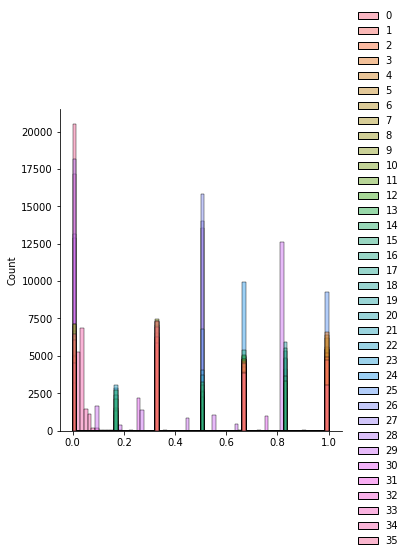

In [ ]:
sns.displot(X_train_scaled)

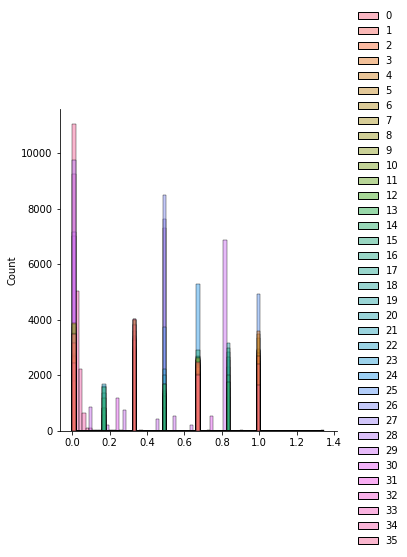

In [ ]:
sns.displot(X_test_scaled)

Random Forest

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Accuracy: 0.929
F1_Score: 0.927
Recall_Score: 0.929
Precision_Score: 0.928


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Cross Validation Score: 0.921
                  precision    recall  f1-score   support

Extremely Severe     0.9843    0.9878    0.9861      3366
            Mild     0.8727    0.6702    0.7581      1146
        Moderate     0.8655    0.9179    0.8909      2082
          Normal     0.9368    0.9825    0.9591      2748
          Severe     0.9176    0.9146    0.9161      1791

        accuracy                         0.9289     11133
       macro avg     0.9154    0.8946    0.9021     11133
    weighted avg     0.9282    0.9289    0.9269     11133



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


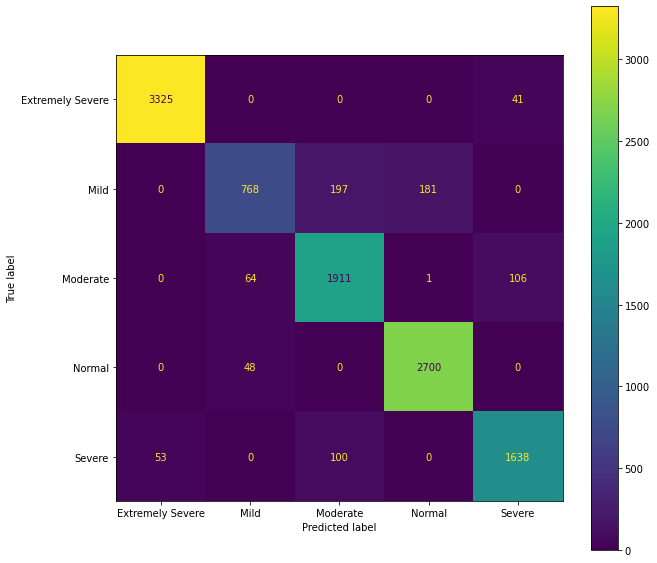

In [ ]:
RanFor=RandomForestClassifier(n_estimators=190,min_samples_split=3,min_samples_leaf=1,max_depth=160,max_features='auto').fit(X_train_scaled,y_train)
Acc_ran=round(accuracy_score(y_test,RanFor.predict(X_test_scaled)),3)
f1_ran=round(f1_score(y_test,RanFor.predict(X_test_scaled),average='weighted'),3)
recall_ran=round(recall_score(y_test,RanFor.predict(X_test_scaled),average='weighted'),3)
precision_ran=round(precision_score(y_test,RanFor.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_ran)
print('F1_Score:',f1_ran)
print('Recall_Score:',recall_ran)
print('Precision_Score:',precision_ran)
print('Cross Validation Score:',round(np.mean(cross_val_score(RanFor, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=RanFor.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(RanFor,X_test_scaled,y_test,ax=ax)

Decision Trees

Accuracy: 0.795
F1_Score: 0.796
Recall_Score: 0.795
Precision_Score: 0.798
Cross Validation Score: 0.783
                  precision    recall  f1-score   support

Extremely Severe     0.9286    0.9343    0.9314      3366
            Mild     0.5202    0.5829    0.5498      1146
        Moderate     0.6815    0.6825    0.6820      2082
          Normal     0.9143    0.8886    0.9013      2748
          Severe     0.6876    0.6549    0.6709      1791

        accuracy                         0.7948     11133
       macro avg     0.7464    0.7487    0.7471     11133
    weighted avg     0.7980    0.7948    0.7961     11133



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


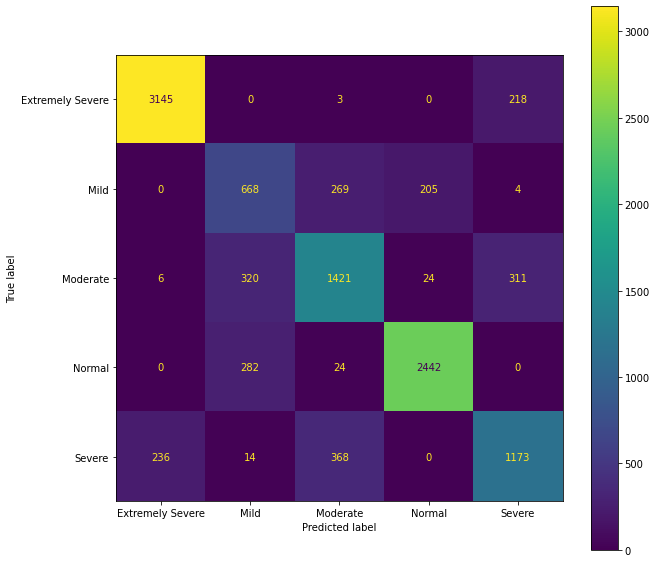

In [ ]:
DT=DecisionTreeClassifier(criterion='entropy',splitter='best',min_samples_split=9,min_samples_leaf=2,max_depth=100).fit(X_train_scaled,y_train)
Acc_dt=round(accuracy_score(y_test,DT.predict(X_test_scaled)),3)
f1_dt=round(f1_score(y_test,DT.predict(X_test_scaled),average='weighted'),3)
recall_dt=round(recall_score(y_test,DT.predict(X_test_scaled),average='weighted'),3)
precision_dt=round(precision_score(y_test,DT.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_dt)
print('F1_Score:',f1_dt)
print('Recall_Score:',recall_dt)
print('Precision_Score:',precision_dt)
print('Cross Validation Score:',round(np.mean(cross_val_score(DT, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=DT.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(DT,X_test_scaled,y_test,ax=ax)

Gaussian Naive Bayes

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.873
F1_Score: 0.878
Recall_Score: 0.873
Precision_Score: 0.895


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Cross Validation Score: 0.869
                  precision    recall  f1-score   support

Extremely Severe     0.9997    0.8892    0.9412      3366
            Mild     0.6118    0.8211    0.7012      1146
        Moderate     0.8704    0.8482    0.8592      2082
          Normal     0.9885    0.8410    0.9088      2748
          Severe     0.7650    0.9542    0.8492      1791

        accuracy                         0.8731     11133
       macro avg     0.8471    0.8707    0.8519     11133
    weighted avg     0.8950    0.8731    0.8783     11133



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


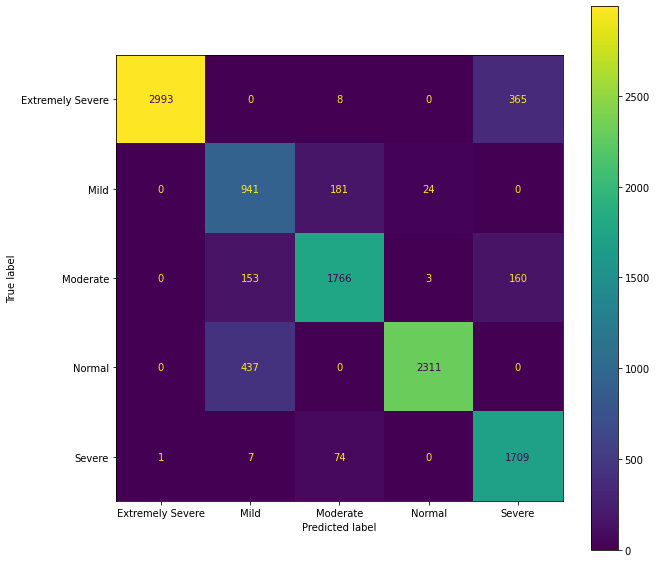

In [ ]:
gb=GaussianNB().fit(X_train_scaled,y_train)
Acc_gb=round(accuracy_score(y_test,gb.predict(X_test_scaled)),3)
f1_gb=round(f1_score(y_test,gb.predict(X_test_scaled),average='weighted'),3)
recall_gb=round(recall_score(y_test,gb.predict(X_test_scaled),average='weighted'),3)
precision_gb=round(precision_score(y_test,gb.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_gb)
print('F1_Score:',f1_gb)
print('Recall_Score:',recall_gb)
print('Precision_Score:',precision_gb)
print('Cross Validation Score:',round(np.mean(cross_val_score(gb, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=gb.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(gb,X_test_scaled,y_test,ax=ax)

Nearest Neighbours

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.883
F1_Score: 0.878
Recall_Score: 0.883
Precision_Score: 0.884


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

Cross Validation Score: 0.878
                  precision    recall  f1-score   support

Extremely Severe     0.9775    0.9807    0.9791      3366
            Mild     0.7534    0.4825    0.5883      1146
        Moderate     0.7544    0.9087    0.8244      2082
          Normal     0.8989    0.9807    0.9380      2748
          Severe     0.9189    0.7778    0.8425      1791

        accuracy                         0.8833     11133
       macro avg     0.8606    0.8261    0.8345     11133
    weighted avg     0.8839    0.8833    0.8778     11133



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


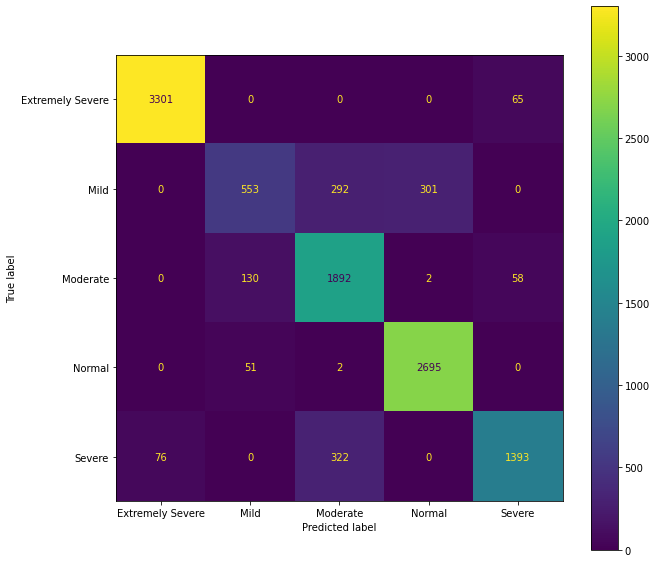

In [ ]:
knn=KNeighborsClassifier(n_neighbors=15).fit(X_train_scaled,y_train)
Acc_knn=round(accuracy_score(y_test,knn.predict(X_test_scaled)),3)
f1_knn=round(f1_score(y_test,knn.predict(X_test_scaled),average='weighted'),3)
recall_knn=round(recall_score(y_test,knn.predict(X_test_scaled),average='weighted'),3)
precision_knn=round(precision_score(y_test,knn.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_knn)
print('F1_Score:',f1_knn)
print('Recall_Score:',recall_knn)
print('Precision_Score:',precision_knn)
print('Cross Validation Score:',round(np.mean(cross_val_score(knn, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=knn.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(knn,X_test_scaled,y_test,ax=ax)

Support Vector Machines

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 1.0
F1_Score: 1.0
Recall_Score: 1.0
Precision_Score: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Cross Validation Score: 1.0
                  precision    recall  f1-score   support

Extremely Severe     1.0000    1.0000    1.0000      3366
            Mild     1.0000    1.0000    1.0000      1146
        Moderate     1.0000    1.0000    1.0000      2082
          Normal     1.0000    1.0000    1.0000      2748
          Severe     1.0000    1.0000    1.0000      1791

        accuracy                         1.0000     11133
       macro avg     1.0000    1.0000    1.0000     11133
    weighted avg     1.0000    1.0000    1.0000     11133



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


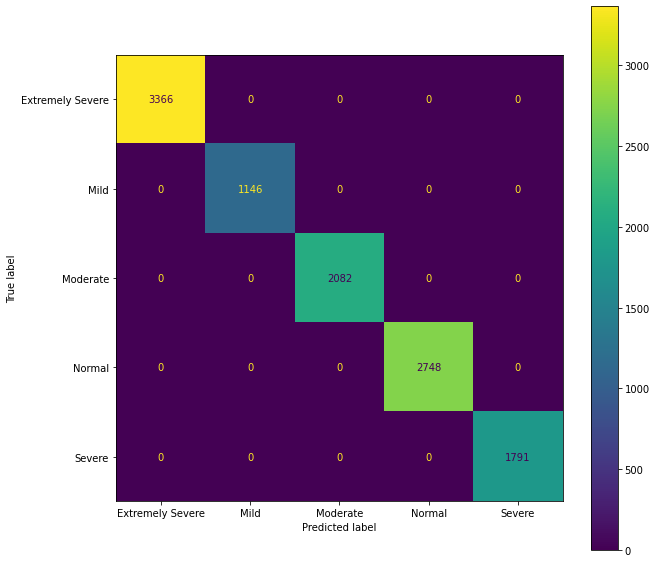

In [ ]:
from sklearn.svm import SVC
svm=SVC(C=100,gamma=0.1,kernel='rbf').fit(X_train_scaled,y_train)
Acc_svm=round(accuracy_score(y_test,svm.predict(X_test_scaled)),3)
f1_svm=round(f1_score(y_test,svm.predict(X_test_scaled),average='weighted'),3)
recall_svm=round(recall_score(y_test,svm.predict(X_test_scaled),average='weighted'),3)
precision_svm=round(precision_score(y_test,svm.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',Acc_svm)
print('F1_Score:',f1_svm)
print('Recall_Score:',recall_svm)
print('Precision_Score:',precision_svm)
print('Cross Validation Score:',round(np.mean(cross_val_score(svm, X_train_scaled, y_train, cv = 6)),3))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=svm.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(svm,X_test_scaled,y_test,ax=ax)

In [ ]:
Result={
                  'Model':['Random-Forest','Decision-Tree','GaussianNB','Nearest-Neighbors','SVM'],
                  'Accuracy(%)':[Acc_ran*100,Acc_dt*100,Acc_gb*100,Acc_knn*100,Acc_svm*100],
                  'F1_Score(%)':[f1_ran*100,f1_dt*100,f1_gb*100,f1_knn*100,f1_svm*100],
                  'Precision(%)':[precision_ran*100,precision_dt*100,precision_gb*100,precision_knn*100,precision_svm*100],
                  'Recall(%)':[recall_ran*100,recall_dt*100,recall_gb*100,recall_knn*100,recall_svm*100],
                    }
Result_Depression=pd.DataFrame(Result)

# Results Achieved from above Modellings

In [ ]:
Result_Depression

,Model,Accuracy(%),F1_Score(%),Precision(%),Recall(%)
0,Random-Forest,92.9,92.7,92.8,92.9
1,Decision-Tree,79.5,79.6,79.8,79.5
2,GaussianNB,87.3,87.8,89.5,87.3
3,Nearest-Neighbors,88.3,87.8,88.4,88.3
4,SVM,100.0,100.0,100.0,100.0


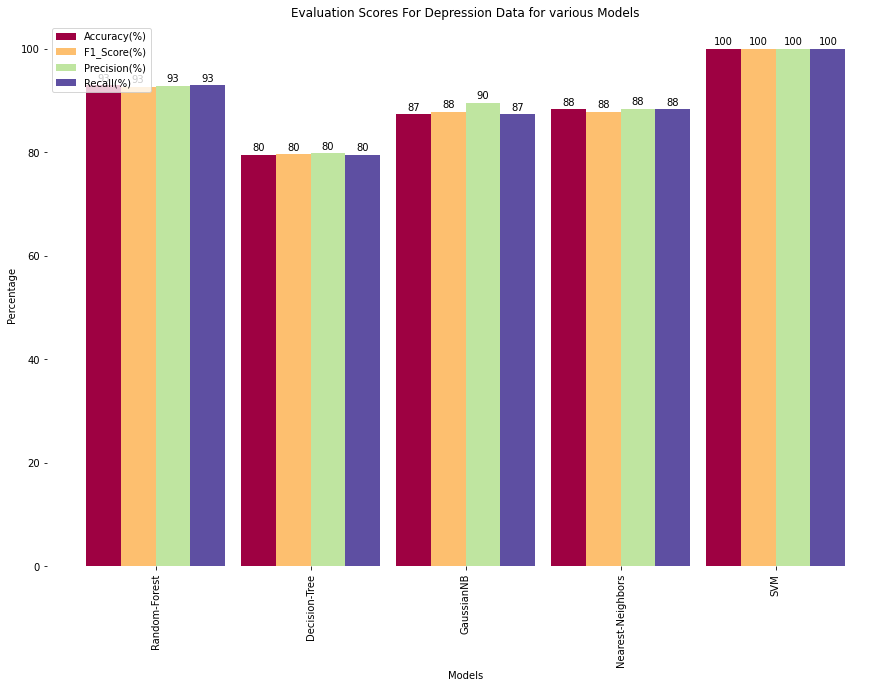

In [ ]:
splot=Result_Depression.plot(x='Model',y=['Accuracy(%)','F1_Score(%)','Precision(%)','Recall(%)'],kind='bar',figsize=(15,10),cmap='Spectral',width=0.9)
for p in splot.patches:
    splot.annotate(format(round(p.get_height()), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0,7),
                   textcoords='offset points')
plt.title('Evaluation Scores For Depression Data for various Models')
plt.ylabel('Percentage')
plt.xlabel('Models')
plt.legend(loc='upper left')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

# Predicting my depression

In [ ]:
arr = []
print("How often is any of the following had been true for you for the past week?")
print("0 = Did not apply to me at all\n1 = Applied to me to some degree, or some of the time\n2 = Applied to me to a considerable degree, or a good part of the time\n3 = Applied to me very much, or most of the time\n")
arr.append(input("I couldn't seem to experience any positive feeling at all.:\nInput 0-3\n"))
arr.append(input("I just couldn't seem to get going.:\nInput 0-3\n"))
arr.append(input("I felt that I had nothing to look forward to.:\nInput 0-3\n"))
arr.append(input("I felt sad and depressed.:\nInput 0-3\n"))
arr.append(input("I felt that I had lost interest in just about everything.:\nInput 0-3\n"))
arr.append(input("I felt I wasn't worth much as a person.:\nInput 0-3\n"))
arr.append(input("I felt that life wasn't worthwhile.:\nInput 0-3\n"))
arr.append(input("I couldn't seem to get any enjoyment out of the things I did.:\nInput 0-3\n"))
arr.append(input("I felt down-hearted and blue.:\nInput 0-3\n"))
arr.append(input("I was unable to become enthusiastic about anything.:\nInput 0-3\n"))
arr.append(input("I felt I was pretty worthless.:\nInput 0-3\n"))
arr.append(input("I was intolerant of anything that kept me from getting on with what I was doing.:\nInput 0-3\n"))
arr.append(input("I felt that life was meaningless.:\nInput 0-3\n"))
arr.append(input("I found it difficult to work up the initiative to do things.:\nInput 0-3\n"))
print("-I see myself as: _____\n")
print("1 = Disagree strongly\n2 = Disagree moderately\n3 = Disagree a little\n4 = Neither agree nor disagree\n5 = Agree a little\n6 = Agree moderately\n7 = Agree strongly\n")
arr.append(input("Extraverted-enthusiastic:\nInput 1-7\n"))
arr.append(input("Critical-quarrelsome:\nInput 1-7\n"))
arr.append(input("Dependable-self_disciplined:\nInput 1-7\n"))
arr.append(input("Anxious-easily upset:\nInput 1-7\n"))
arr.append(input("Open to new experiences-complex:\nInput 1-7\n"))
arr.append(input("Reserved-quiet:\nInput 1-7\n"))
arr.append(input("Sympathetic-warm:\nInput 1-7\n"))
arr.append(input("Disorganized-careless:\nInput 1-7\n"))
arr.append(input("Calm-emotionally_stable:\nInput 1-7\n"))
arr.append(input("Conventional-uncreative:\nInput 1-7\n"))
arr.append(input("Education:\n1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree\n"))
arr.append(input("Urban:\n1=Rural (country side), 2=Suburban, 3=Urban (town, city)\n"))
arr.append(input("Gender:\n1=Male, 2=Female, 3=Other\n"))
arr.append(input("Native English Speaker:\n1=Yes, 2=No\n"))
arr.append(input("Handedness:\n1=Right, 2=Left, 3=Both\n"))
arr.append(input("Religion:\n1=Agnostic, 2=Atheist, 3=Buddhist, 4=Christian (Catholic), 5=Christian (Mormon), 6=Christian (Protestant), 7=Christian (Other), 8=Hindu, 9=Jewish, 10=Muslim, 11=Sikh, 12=Other\n"))
arr.append(input("Sexual Orientation:\n1=Heterosexual, 2=Bisexual, 3=Homosexual, 4=Asexual, 5=Other\n"))
arr.append(input("Race:\n10=Asian, 20=Arab, 30=Black, 40=Indigenous Australian, 50=Native American, 60=White, 70=Other\n"))
arr.append(input("Voted in Election:\n1=Yes, 2=No\n"))
arr.append(input("Married:\n1=Single, 2=Married, 3=Divorce\n"))
arr.append(input("Family Size:\n"))
arr.append(input("Age Groups:\n0 - Under 6 Children( <= 6 )\n1 - Primary Children ( 7 - 12 )\n2 - Teenagers ( 13 - 17 )\n3 - Adults ( 18 - 59 )\n4 - Elderly ( >= 60 )\n"))
print(arr)

samples = []
samples.append(arr)
samples_scaled = scaler.transform(np.array(samples))
RanFor_predictions = RanFor.predict(samples_scaled)
DT_predictions = RanFor.predict(samples_scaled)
gb_predictions = gb.predict(samples_scaled)
knn_predictions = knn.predict(samples_scaled)
print("Random Forest: ", RanFor_predictions)
print("Decision Tree: ", DT_predictions)
print("Gaussian Naive-Bayes: ", gb_predictions)
print("K-Nearest Neighbour: ", knn_predictions)

How often is any of the following had been true for you for the past week?
0 = Did not apply to me at all
1 = Applied to me to some degree, or some of the time
2 = Applied to me to a considerable degree, or a good part of the time
3 = Applied to me very much, or most of the time



KeyboardInterrupt: ignored